In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Vasicek Model 2 fattori
Considerando lo short rate $r(t)$ come somma tra due processi Orns.Uhl: $$dr(t) = dx_1(t) + dx_2(t)$$ con i due BM correlati e $x(0) = y(0) = 0$

$$dx_1(t) = \alpha_1(\gamma_1 - x(t))dt + \sigma_1 d W_x(t), \\
dx_2(t) = \alpha_2(\gamma_2 - y(t))dt + \sigma_2 d W_y(t), \\
corr(dW_x(t), dW_y(t)) = \rho.$$

Applicando Ito alle funzioni $F_1(t,x_1) = x_1\exp^{\alpha_1t}$ e $F_2(t,x_2) = x_2\exp^{\alpha_2t}$ si ottiene media e varianza condizionata sotto la distribuzione Normale bivariata, ho messo la N grande stavolta :)
$$\mathbb{E}[x_1(t)|x_1(s)] = \gamma_1 - [\gamma_1 - x_1(s)]\exp^{-\alpha_1 (t-s)} \hspace{8mm} var[x_1(t)|x_1(s)] = \frac{\sigma_1^2}{2\alpha_1}\bigg[1 - \exp^{-2\alpha_1(t - s)}\bigg]\\
\mathbb{E}[x_2(t)|x_2(s)] = \gamma_2 - [\gamma_2 - x_2(s)]\exp^{-\alpha_2 (t-s)} \hspace{8mm} var[x_2(t)|x_2(s)] = \frac{\sigma_2^2}{2\alpha_2}\bigg[1 - \exp^{-2\alpha_2(t - s)}\bigg] \\
cov(x_1, x_2) =  \frac{\sigma_1 \sigma_2}{\alpha_1 + \alpha_2}\bigg[1 - \exp^{-(\alpha_1 + \alpha_2)(t - s)}\bigg] $$

In [148]:
class vasicek_2fmodel:
    
    def __init__(self, alpha1, alpha2, gamma1, gamma2, sigma1, sigma2, rho):
        self.alpha1 = alpha1 
        self.alpha2 = alpha2
        self.gamma1 = gamma1
        self.gamma2 = gamma2
        self.sigma1 = sigma1
        self.sigma2 = sigma2
        self.rho = rho       
    
    def __Bfunc(self, s, t, z):
        tau = t - s
        b = (1-np.exp(-z*tau))/z
        return b
    def __condMeanX1(self, s, t, xs):
        tau = t-s
        Ex1 = self.gamma1 - (self.gamma1 - xs)*np.exp(-self.alpha1*tau)
        return Ex1
    def __condVarX1(self, s, t):
        tau = t - s
        varX1 = (self.sigma1**2)*self.__Bfunc(s, t, 2*self.alpha1)
        return varX1
    def __condMeanX2(self, s, t, xs):
        tau = t-s
        Ex2 = self.gamma2 - (self.gamma2 - xs)*np.exp(-self.alpha2*tau)
        return Ex2
    def __condVarX2(self, s, t):
        tau = t - s
        varX2 = (self.sigma2**2)*self.__Bfunc(s, t, 2*self.alpha2)
        return varX2
    def __covX1X2(self, s, t):
        cov = self.rho*self.sigma1*self.sigma2*self.__Bfunc(s, t, self.alpha1 + self.alpha2)
        return cov
    
    def MCsimulation(self, Npath, time_grid):
        m = len(time_grid)
        r = np.zeros((Npath, m))
        x1 = np.zeros((Npath, m))
        x2 = np.zeros((Npath, m))
        for n in range(0, Npath):
            for i in range(1, m):
                s = time_grid[i -1]
                t = time_grid[i]
                E_x1 = self.__condMeanX1(s, t, x1[n, i-1])
                E_x2 = self.__condMeanX2(s, t, x2[n, i-1])
                var_x1 = self.__condVarX1(s, t)
                var_x2 = self.__condVarX2(s, t)
                cov = self.__covX1X2(s, t)
                means = [E_x1, E_x2]
                cov_matrix = [[var_x1, cov], [cov, var_x2]]
                x1[n, i], x2[n, i] = np.random.multivariate_normal(means, cov_matrix)
                r[n, i] = x1[n, i] + x2[n, i]
        return r, x1, x2
    

In [149]:
model = vasicek_2fmodel(0.02, 0.03, 0.5, 0.02, 0.0030, 0.012, -0.70)

In [167]:
Npath = 1000
time_grid = np.linspace(0, 10, num = 20)

In [168]:
r, x1, x2 = model.MCsimulation(Npath, time_grid)

In [166]:
i = 1
np.corrcoef(x1[:,i], x2[:,i])

array([[ 1.        , -0.70485117],
       [-0.70485117,  1.        ]])

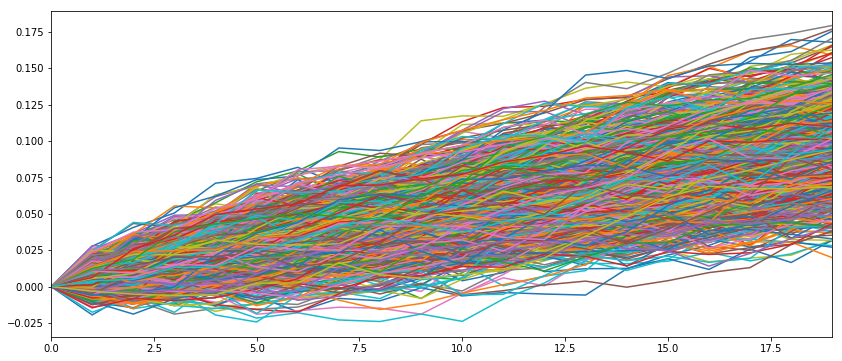

In [187]:
df = pd.DataFrame(r)
df.T.plot(figsize = (14,6), legend = False);

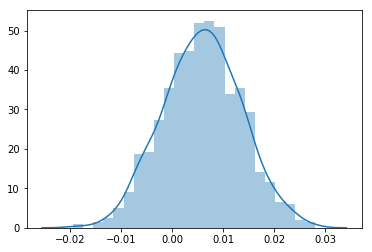

In [184]:
sns.distplot(r[:,1])